# Load Library

In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statistics
from collections import Counter

# Load Data

In [5]:
file_path_csv = "Seton COVID Cohort Dataset Share SDH/covid_pts_enc_level_labs_dx_2021-02-02_deid.csv"
file_path_csv_extra = "Seton COVID Cohort Dataset Share SDH/meds_admin_for_SOFA_COVID_cohort_SDH_share.csv"

# Read csv as a dataframe from the path
df = pd.read_csv(file_path_csv, index_col=False)
df_extra = pd.read_csv(file_path_csv_extra, index_col=False)

# Exploratory Data Anlaysis (EDA)

## Main data

In [17]:
display(df.info())
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   admit_dt_tm                    2469 non-null   object 
 1   discharge_dt_tm                2384 non-null   object 
 2   facility                       2469 non-null   object 
 3   encounter_type_display         2469 non-null   object 
 4   age_at_admit                   2469 non-null   int64  
 5   gender                         2469 non-null   object 
 6   zip_cust_table                 2469 non-null   object 
 7   ethnicity_display              2469 non-null   object 
 8   race_display                   2469 non-null   object 
 9   race_eth_comb                  2445 non-null   object 
 10  length_of_stay                 2384 non-null   float64
 11  icd_prim                       2328 non-null   object 
 12  deceased_dt_tm                 216 non-null    o

None

(2469, 70)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,NaN,4dMaH,61003,10650
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,3.0,8wQnr,84969,27818
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,...,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,0.0,iouKO,76686,41152


In [23]:
# Convert datetime in object format into datetime format
df['admit_dt_tm'] = pd.to_datetime(df['admit_dt_tm'])
df['discharge_dt_tm'] = pd.to_datetime(df['discharge_dt_tm'])

In [36]:
df['admit_dt_tm'].nunique()

2457

In [34]:
df.loc[df.duplicated(subset=['admit_dt_tm'])==True]

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,...,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
148,2020-06-04 20:15:00,2020-06-06 21:46:00,Medical Center,IP Private/Semi Private room,26,Female,78752,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,False,0.0,Y5Kyb,79711,27492
502,2020-07-07 14:49:00,2020-07-09 15:00:00,Medical Center,IP Private/Semi Private room,94,Female,78702,Hispanic or Latino,White,White Hispanic,...,False,False,False,True,False,False,2.0,WH0SC,60001,36361
592,2020-07-13 02:15:00,2020-07-17 20:05:00,Medical Center,IP Private/Semi Private room,29,Male,78750,Not Hispanic or Latino,White,White Non Hispanic,...,False,False,False,False,False,False,0.0,mz2z3,88944,39021
1055,2020-06-12 22:59:00,2020-06-13 13:30:00,Dell Seton Med Cntr UT,Observation,25,Female,78744,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,False,True,0.0,oyH7D,85723,30518
1098,2020-06-17 20:20:00,2020-06-19 16:00:00,Dell Seton Med Cntr UT,IP Private Room,24,Male,78724,Hispanic or Latino,White,White Hispanic,...,False,False,False,False,True,False,0.0,1IeAk,60290,12366
1142,2020-06-22 20:03:00,2020-06-26 17:00:00,Dell Seton Med Cntr UT,IP Private Room,87,Female,78703,Not Hispanic or Latino,White,White Non Hispanic,...,True,False,True,True,True,False,0.0,2fQon,69131,46774
1227,2020-06-29 22:54:00,2020-07-17 21:28:00,Dell Seton Med Cntr UT,IP Private Room,65,Male,78957,Not Hispanic or Latino,White,White Non Hispanic,...,True,True,False,False,False,False,1.0,uilI1,61120,20647
1317,2020-07-06 10:42:00,2020-07-09 16:15:00,Dell Seton Med Cntr UT,IP Private Room,90,Female,78745,Hispanic or Latino,White,White Hispanic,...,True,True,False,False,False,True,0.0,6GnLB,78552,17749
1341,2020-07-08 19:25:00,2020-07-10 21:10:00,Dell Seton Med Cntr UT,IP Private Room,76,Female,78644,Hispanic or Latino,White,White Hispanic,...,True,True,True,False,True,False,NaN,SaLut,75088,31102
1416,2020-07-16 16:07:00,2020-08-06 13:59:00,Dell Seton Med Cntr UT,IP Private Room,92,Male,78653,Hispanic or Latino,White,White Hispanic,...,True,False,False,True,False,False,1.0,nqyHy,70819,35077


## Extra data

In [18]:
display(df_extra.info())
print(df_extra.shape)
df_extra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33892 entries, 0 to 33891
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   medication_name       33892 non-null  object 
 1   dose_of_medication    33892 non-null  object 
 2   administration_dt_tm  33892 non-null  object 
 3   SOFA                  0 non-null      float64
 4   deid_fin_encounter    33892 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB


None

(33892, 5)


,medication_name,dose_of_medication,administration_dt_tm,SOFA,deid_fin_encounter
0,norepinephrine,0.030122 mg,2020-08-03T09:59:59.000-05:00,NaN,35541
1,norepinephrine,0.11296 mg,2020-08-02T23:59:59.000-05:00,NaN,35541
2,norepinephrine,0.077088 mg,2020-08-02T22:59:59.000-05:00,NaN,35541
3,norepinephrine,mcg/kg/min,2020-08-03T09:15:00.000-05:00,NaN,35541
4,norepinephrine,0.080864 mg,2020-08-03T05:59:59.000-05:00,NaN,35541


In [11]:
# Total number of patients who have medication admin data to calculate SOFA score
df_extra['deid_fin_encounter'].nunique()

115

# Preprocess Data

## Functions

### Calculate qSOFA scores

In [173]:
# https://link.springer.com/content/pdf/10.1186/s12879-020-05102-7.pdf
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4968574/#BX3
# https://jamanetwork.com/journals/jama/fullarticle/2492875
# https://qsofa.org/what.php

# qSOFA socre == 0 or 1: Low risk
# qSOFA score == 2 or 3: High risk
calibration_qsofa_mortality = {
    0: 0.6,
    1: 5,
    2: 10,
    3: 24
}

### Calculate comorbidity conditions

In [174]:
def count_comorbidity(patient):
    count = 0 
    
    if patient.COPD_com_flag == 1:
        count += 1 
        
    if patient.asthma_com_flag == 1:
        count += 1 
        
    if patient.diabetes_com_flag == 1:
        count += 1 
        
    if patient.hypertension_com_flag == 1:
        count += 1 
        
    if patient.CAD_com_flag == 1:
        count += 1 
        
    if patient.heartfailure_com_flag == 1: 
        count += 1 
        
    if patient.CKD_com_flag == 1:
        count += 1 
        
    if patient.cancer_com_flag == 1:
        count += 1 
        
    return count

### Calculate percentage of deaths for each race

In [175]:
def percentage_death(race):
    count = count_race[race.race]# Number of patients in their racial groups

    return (race.count_death / count) * 100

## Create sample

### Generate dataframe of ICU patients

In [176]:
# Patients who were admitted to ICU, had qSOFA scores, and were in one of racial groups (White, Black or African American, Hispanic or Latino, Asian)
df_icu = df.loc[(df['icu_hours_summed'].notnull()) &
                (df['qSOFA_score'].notnull())]

### Extract necessary columns

In [177]:
cols_sample = ['age_at_admit', 'gender', 'zip_cust_table', 'ethnicity_display', 'race_display', 'discharge_disposition_display',
               'vent_hours_summed', 'icu_hours_summed', 'COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
               'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag', 'CKD_com_flag', 'cancer_com_flag',
               'qSOFA_score', 'deid_fin_encounter']

df_sample = df_icu[cols_sample].copy()

### Ethnicity/Race
Make a distinction between White and Hispanic/Latino

In [178]:
ls_race = ['White', 'Black or African American', 'Hispanic or Latino', 'Asian']

def latinx(patient):
    if patient.ethnicity_display == 'Hispanic or Latino' and patient.race_display == 'White':
        return "Hispanic or Latino"
    elif patient.ethnicity_display == 'Not Hispanic or Latino' and patient.race_display == 'White': 
        return "White"
    elif patient.race_display == 'Hispanic':
        return "Hispanic or Latino"
    else:
        return patient.race_display

df_sample['race_display'] = df_sample.apply(lambda patient: latinx(patient), axis=1)
#df_sample = df_sample.loc[df['race_display']!='Native Hawaiian or Other Pacific Islande']
df_sample = df_sample.loc[df['race_display'].isin(ls_race)]
Counter(df_sample['race_display'])

Counter({'Hispanic or Latino': 356,
         'White': 242,
         'Black or African American': 59,
         'Asian': 7})

### Impute Missing Values

In [179]:
# Fill missing values in columns related to comorbodity conditions with 0
cols_comorbidity = ['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
                    'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
                    'CKD_com_flag', 'cancer_com_flag']

df_sample[cols_comorbidity] = df_sample[cols_comorbidity].fillna(0)
df_sample[cols_comorbidity] = df_sample[cols_comorbidity].astype(int)

### Add new columns

In [180]:
df_sample['count_comorbidity'] = df_sample.apply(lambda patient: count_comorbidity(patient), axis=1)
df_sample['has_comorbidity'] = df_sample['count_comorbidity'].apply(lambda count: 1 if count >= 1 else 0)
df_sample['life_years'] = df_sample['age_at_admit'].apply(lambda age: 100 - age)

# Merge df_sample with zip_df
df_zip = pd.read_csv('zip_code_data.csv', index_col=False)
df_zip['zip_code'] = df_zip.zip_code.apply(lambda row: row.strip('ZCTA5 '))
df_sample = pd.merge(df_sample, df_zip, left_on='zip_cust_table', right_on='zip_code', how='inner')
df_sample.drop(columns=['zip_cust_table'], axis=1, inplace=True)

print(df_sample.shape)
df_sample.head()

(602, 26)


,age_at_admit,gender,ethnicity_display,race_display,discharge_disposition_display,vent_hours_summed,icu_hours_summed,COPD_com_flag,asthma_com_flag,diabetes_com_flag,...,deid_fin_encounter,count_comorbidity,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate
0,44,Male,Hispanic or Latino,Hispanic or Latino,Expired,58.45,69.48,0,0,0,...,27818,0,0,56,78130,1.5,10,65627,84515,9.5
1,71,Male,Hispanic or Latino,Hispanic or Latino,Rehab Care,352.62,598.51,0,0,1,...,43894,2,1,29,78130,1.5,10,65627,84515,9.5
2,71,Male,Hispanic or Latino,Hispanic or Latino,Skilled Nursing Care,NaN,21.50,0,0,1,...,48974,3,1,29,78130,1.5,10,65627,84515,9.5
3,47,Female,Unknown,White,Still a patient,NaN,43.03,0,0,0,...,17000,0,0,53,78130,1.5,10,65627,84515,9.5
4,49,Female,Not Hispanic or Latino,White,Home,293.02,160.17,0,0,0,...,23744,0,0,51,78612,6.3,10.9,69213,80458,10.6


In [181]:
count_race = Counter(df_sample['race_display'])
count_race

Counter({'Hispanic or Latino': 330,
         'White': 216,
         'Black or African American': 51,
         'Asian': 5})

# Calculate Mortality Probability

1. Mortality probabilities corresponding to SOFA scores are calculated within ICU patients in the sample.

In [182]:
len(df_sample.loc[df_sample['discharge_disposition_display']=='Expired'])

131

In [183]:
len(df_sample.loc[df_sample['discharge_disposition_display']!='Expired'])

471

In [184]:
df_reg_logistic[['qSOFA_score', 'discharge_disposition_display']] = df_reg_logistic[['qSOFA_score', 'discharge_disposition_display']].astype(int)

NameError: name 'df_reg_logistic' is not defined

In [ ]:
df_reg_logistic[['qSOFA_score', 'discharge_disposition_display']].dtypes

qSOFA_score                      int64
discharge_disposition_display    int64
dtype: object

In [ ]:
df_reg_logistic_tmp = df_reg_logistic[['qSOFA_score', 'discharge_disposition_display']].groupby('qSOFA_score').agg(['count', 'sum', 'mean']).reset_index()
df_reg_logistic_tmp.rename(columns={'count': 'count_patient', 'sum': 'count_death', 'mean': 'percentage_death'})

qSOFA_score discharge_disposition_display                             
                              count_patient count_death percentage_death
0         0.0                           161          30         0.186335
1         1.0                           333          55         0.165165
2         2.0                            94          40         0.425532
3         3.0                            14           6         0.428571

In [ ]:
df_reg_logistic[['deid_fin_encounter', 'qSOFA_score', 'discharge_disposition_display']].groupby(['qSOFA_score', 'discharge_disposition_display']).count()
#df_reg_logistic_tmp = df_reg_logistic[['qSOFA_score', 'discharge_disposition_display']].groupby(['qSOFA_score', 'discharge_disposition_display']).agg(['count', 'sum', 'mean']).reset_index()
#df_reg_logistic_tmp.rename(columns={'count': 'count_patient', 'sum': 'count_death', 'mean': 'percentage_death'})

deid_fin_encounter
qSOFA_score discharge_disposition_display                    
0           0                                             131
            1                                              30
1           0                                             278
            1                                              55
2           0                                              54
            1                                              40
3           0                                               8
            1                                               6

In [ ]:
131/602

0.21760797342192692

In [ ]:
30/131

0.22900763358778625

In [ ]:
55/131

0.4198473282442748

In [ ]:
40/131

0.3053435114503817

In [ ]:
6/131

0.04580152671755725

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df_reg_logistic = df_sample.copy()
#df_reg_logistic.loc[df_reg_logistic['discharge_disposition_display']!='Expired', 'discharge_disposition_display'] = 'Not Expired'
df_reg_logistic.loc[df_reg_logistic['discharge_disposition_display']!='Expired', 'discharge_disposition_display'] = 0
df_reg_logistic.loc[df_reg_logistic['discharge_disposition_display']=='Expired', 'discharge_disposition_display'] = 1
df_reg_logistic['discharge_disposition_display'] = df_reg_logistic['discharge_disposition_display'].astype(int)

X = df_reg_logistic[['qSOFA_score']]                        # Dependent variable
y = df_reg_logistic['discharge_disposition_display']       # Independent variable, and it is needed to be preprocessed to make binary category

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

reg_logistic = LogisticRegression()
reg_logistic.fit(X, y)
#reg_logistic.fit(X_train, y_train)
y_pred_prob = reg_logistic.predict_proba(X)
#y_pred_prob = reg_logistic.predict(X_test)
print(y_pred_prob)

#for i in range(len(y_pred_prob)):   # For each patient, assign mortality probabilty
#    df_sample['mortality_prob'] = y_pred_prob[i][1]

#print(df_reg_logistic['mortality_prob'].groupby('qSOFA_score').agg('mean'))    # Display means of mortality probabilities in each SOFA score group
#
#reg_log = sm.Logit(y, X).fit()
#print(reg_log.summary())

[[0.54251046 0.45748954]
 [0.67454042 0.32545958]
 [0.78366157 0.21633843]
 ...
 [0.78366157 0.21633843]
 [0.78366157 0.21633843]
 [0.86359473 0.13640527]]


In [ ]:
len(y_pred_prob)

602

In [ ]:
cnt = 0
for i in range(len(y_pred_prob)):
    
    if y_pred_prob[i][0] > y_pred_prob[i][1]:
        #print(y_pred_prob[i])
        cnt += 1
        
print(cnt)

602


2. Moratlity probabilities corresponding to SOFA scores within the same racial group

In [ ]:
reg_logistic.classes_

array([0, 1])

In [ ]:
for race in col_race:   # Iterate 
    X = df_sample.loc[df_sample['SOFA_score'] & df_sample['race_display']==race]                          # Dependent variable
    y = df_sample.loc[df_sample['discharge_disposition_display'] & df_sample['race_display']==race]       # Independent variable

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

    reg_logistic = LogisticRegression()
    reg_logistic.fit(X, y)
    y_pred_prob = reg_logistic.predict_proba(X)
    print(y_pred_prob)

    for i in range(len(y_pred_prob)):   # For each patient, assign mortality probabilty
        df_sample['mortality_prob'] = y_pred_prob[i][1]

    print(df_sample['mortality_prob'].groupby('SOFA_score').agg('mean'))    # Display means of mortality probabilities in each SOFA score group

    reg_log = sm.Logit(y, X).fit()
    print(reg_log.summary())

3. Mortality probabilities corresponding to a specific subscore, respiratory failure, of SOFA scores

In [ ]:
X = df_sample.loc[df_sample['SOFA_score']=='respiratory']   # Dependent variable: Only respriatory failure
y = df_sample['discharge_disposition_display']              #  Independent variable, and it is needed to be preprocessed to make binary category

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

reg_logistic = LogisticRegression()
reg_logistic.fit(X, y)
y_pred_prob = reg_logistic.predict_proba(X)
print(y_pred_prob)

for i in range(len(y_pred_prob)):   # For each patient, assign mortality probabilty
    df_sample['mortality_prob'] = y_pred_prob[i][1]

print(df_sample['mortality_prob'].groupby('SOFA_score').agg('mean'))    # Display means of mortality probabilities in each SOFA score group

reg_log = sm.Logit(y, X).fit()
print(reg_log.summary())

# Develop allocation

In [185]:
# The number of simulations
iter_simulation = 1000

# Levels of ventilator scarcity
scarcity_indicator_level = np.linspace(0,1,11)
scarcity_indicator_level.round(1)
scarcity_indicator_level

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [186]:
class Allocation(object):
  
    def __init__(self, df, scarcity_level, calibration_qsofa_mortality):
        self.patients = df.copy() 
        self.patients['death'] = [0 for _ in range(len(self.patients))]             # All patients are initially set to survive
        self.patients['allocate_vent'] = [0 for _ in range(len(self.patients))]     # All patients are not initially allocated to ventilators  
        self.num_vents = int(len(self.patients) * scarcity_level)                   # Number of ventilators available
        self.model_mortality = calibration_qsofa_mortality
        
    def __run_allocation(self, df, flag_simulation):
        df_patients_priotized = df.copy()

        for i, patient in df_patients_priotized.iterrows():     # Allocate a patient to ventilator
            if self.num_vents == 0:                             # If no ventialtors available, then stop allocating ventilators
                break
            
            mortality, flag_alloc = self.allocate(patient, flag_simulation)
                
            df_patients_priotized.loc[i, 'death'] = mortality
            df_patients_priotized.loc[i, 'allocate_vent'] = flag_alloc
            
            self.num_vents -= 1
    
        allocated = df_patients_priotized.loc[df_patients_priotized['allocate_vent']==1]
        allocated_not = df_patients_priotized.loc[df_patients_priotized['allocate_vent']==0]
        
        allocated_not_adj = self.check_expiration(allocated_not)
        
        return pd.concat([allocated, allocated_not_adj]) 
    
    def allocate(self, row, flag_simulation):
        patient = row.copy()

        prob_mortality = self.model_mortality[patient.qSOFA_score]      # Get mortality probability corresponding to a patient's qSOFA score
        
        if flag_simulation == 0:    # Analytical approach
            if patient['vent_hours_summed']==np.nan and patient['discharge_disposition_display'] == 'Expired': # Need to research
                return 1, 1
            elif patient['vent_hours_summed']==np.nan and patient['discharge_disposition_display'] != 'Expired':
                return 0, 1
            elif patient['vent_hours_summed']!=np.nan and patient['discharge_disposition_display'] == 'Expired':
                return 1, 1
            elif patient['vent_hours_summed']!=np.nan and patient['discharge_disposition_display'] != 'Expired':
                return 0, 1

        elif flag_simulation == 1:  # Simulation approach
            if patient['vent_hours_summed']==np.nan and patient['discharge_disposition_display'] == 'Expired': # Need to research
                return 1, 1
            elif patient['vent_hours_summed']==np.nan and patient['discharge_disposition_display'] != 'Expired':
                return 0, 1
            elif patient['vent_hours_summed']!=np.nan and patient['discharge_disposition_display'] == 'Expired':
                return 1, 1
            elif patient['vent_hours_summed']!=np.nan and patient['discharge_disposition_display'] != 'Expired':
                return 0, 1
            #death = np.random.binomial(size=1, n=1, p=prob_mortality*.01)[0]

            #if death == 1 or patient.discharge_disposition_display == 'Expired':
            #if patient.qSOFA_score >= 2 or patient.discharge_disposition_display == 'Expired': # High risk
            '''if prob_mortality >= 10 or patient.discharge_disposition_display == 'Expired': # High risk
                return 1, 1
            else:
                return 0, 1'''
        
        '''if flag_simulation == 0:    # Analytical approach
            #if patient.qSOFA_score >= 2 or patient.discharge_disposition_display == 'Expired': # High risk
            if prob_mortality >= 10 or patient.discharge_disposition_display == 'Expired': # High risk
                return 1, 1
            else:   # Low risk
                return 0, 1
        elif flag_simulation == 1:  # Simulation approach
            #death = np.random.binomial(size=1, n=1, p=prob_mortality*.01)[0]

            #if death == 1 or patient.discharge_disposition_display == 'Expired':
            #if patient.qSOFA_score >= 2 or patient.discharge_disposition_display == 'Expired': # High risk
            if prob_mortality >= 10 or patient.discharge_disposition_display == 'Expired': # High risk
                return 1, 1
            else:
                return 0, 1'''
    
    def check_expiration(self, df): # Mortality for patients not admitted to ventilators
        allocated_not = df.copy()

        for i, patient in df.iterrows():
            patient = patient.copy()

            if patient['vent_hours_summed']==np.nan and patient['discharge_disposition_display'] == 'Expired':
                allocated_not.loc[i, 'death'] = 1
            elif patient['vent_hours_summed']==np.nan and patient['discharge_disposition_display'] != 'Expired':
                allocated_not.loc[i, 'death'] = 0
            elif patient['vent_hours_summed']!=np.nan and patient['discharge_disposition_display'] == 'Expired':
                allocated_not.loc[i, 'death'] = 1
            elif patient['vent_hours_summed']!=np.nan and patient['discharge_disposition_display'] != 'Expired':  # Need to research
                allocated_not.loc[i, 'death'] = 1

            '''if (pd.isna(patient.vent_hours_summed)) or patient.discharge_disposition_display == 'Expired':  # A patient did not receive a ventilator in the observed data and the simulation
                allocated_not.loc[i, 'death'] = 1
            else:
                allocated_not.loc[i, 'death'] = 0'''
                         
        return allocated_not
    
    def __categorize_age(self, patient):    # Life-cycle consideration delineated in Maryland CSC
        if patient.age_at_admit < 50:
            return 1 
        elif patient.age_at_admit < 70: 
            return 2 
        elif patient.age_at_admit < 85:
            return 3 
        else:
            return 4
    
    '''
    State-level Crisis Standards of Care (CSC)
    '''
    def new_york(self):
        df_patients = self.patients.copy()
        flag_simulation = 0

        # Prioritize patients by shuffling orders within patients having the same qSOFA scores
        groups_qsofa = [df for _, df in df_patients.groupby('qSOFA_score')]      # Group patients based on qSOFA scores
        random.shuffle(groups_qsofa)                                             # Shuffle patients in each qSOFA score group randomly
        df_prioritized = pd.concat(groups_qsofa).reset_index(drop=True)             # Re-combine groups seperated by qSOFA scores
        df_prioritized.sort_values('qSOFA_score', ascending=True, inplace=True)     # Sort patients by qSOFA scores in ascending order
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated
    
    def maryland(self):
        df_patients = self.patients.copy()
        flag_simulation = 0

        # Assign patients into age catetory
        df_patients['cat_age'] = df_patients.apply(lambda patient: self.__categorize_age(patient), axis=1)     # Categorize patients' age
    
        # Prioritize patients who have lower SOFA score first, then small amount of comorbidities, and finally are in youger age category first
        df_patients.sort_values(by=['qSOFA_score', 'count_comorbidity', 'cat_age'], ascending=[True, True, True], inplace=True)
        df_prioritized = df_patients.copy()
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
    
    '''
    Non State-level Crisis Standards of Care (CSC)
    '''
    def max_lives_saved(self):
        df_patients = self.patients.copy()
        flag_simulation = 0
        
        # Prioritize patients who have lower SOFA scores first
        df_patients.sort_values(by=['qSOFA_score'], ascending=True, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
    
    def max_life_years(self):
        df_patients = self.patients.copy()
        flag_simulation = 0

        # Prioritize patients who have lower SOFA scores and then more life years to live
        df_patients.sort_values(by=['qSOFA_score', 'life_years'], ascending=[True,False], inplace=True)
        df_prioritized = df_patients.copy()

        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
    
    def youngest(self):
        df_patients = self.patients.copy()
        flag_simulation = 0
        
        # Prioritize patients who are younger first
        df_patients.sort_values(by=['age_at_admit'], ascending=True, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
        
    def sickest(self):
        df_patients = self.patients.copy()
        flag_simulation = 0
        
        # Prioritize patients who have higher SOFA scores first
        df_patients.sort_values(by=['qSOFA_score'], ascending=False, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated
    
    def lottery(self):
        df_patients = self.patients.copy()
        flag_simulation = 1
        
        # Prioritize patients by shuffling them and get a sample including all patients(frac=1)
        df_patients.sample(frac=1)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
        

# Allocate ventilators (Baseline)

In [187]:
death_race_baseline = Counter(df_sample.loc[df_sample['discharge_disposition_display']=='Expired']['race_display'])
pd.DataFrame.from_dict(death_race_baseline, orient='index', columns=['count_death']).reset_index().rename(columns={'index': 'race'})

,race,count_death
0,Hispanic or Latino,76
1,White,37
2,Black or African American,15
3,Asian,3


In [188]:
avg_death_baseline = statistics.mean(death_race_baseline.values())  # Average of deaths for all racial groups
death_race_baseline = pd.DataFrame(death_race_baseline.items(), columns=['race', 'count_death'])
death_race_baseline['level'] = 2.0   # Nothing about scarcity level
death_race_baseline['avg_death'] = avg_death_baseline
death_race_baseline['percentage_death'] = death_race_baseline.apply(lambda row: percentage_death(row), axis=1)  # Ratio of death for each racial group from total deaths
death_race_baseline['type_allocation'] = 'Baseline'
death_race_baseline

,race,count_death,level,avg_death,percentage_death,type_allocation
0,Hispanic or Latino,76,2.0,32.75,23.030303,Baseline
1,White,37,2.0,32.75,17.129630,Baseline
2,Black or African American,15,2.0,32.75,29.411765,Baseline
3,Asian,3,2.0,32.75,60.000000,Baseline


# Allocate ventilators (Analytical approach)

## New York

In [189]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []
sum_death = 0 # Number of deaths

for level in scarcity_indicator_level:
    
    allocation = Allocation(df_sample, level, calibration_qsofa_mortality)   # Generate Allocation object
    df_alloc = allocation.new_york()                                         # Prioritize patients following Maryland CSC
    
    ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    sum_death += df_alloc['death'].sum()                                   # Sum of all deaths for every level of scarcity
    df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_count_death_race['level'] = round(level, 1)
    df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_count_death_race)

df_new_york = pd.concat(ls_df_count_death_race)
df_new_york['type_allocation'] = 'New York'
df_new_york_tmp = pd.concat([death_race_baseline, df_new_york])

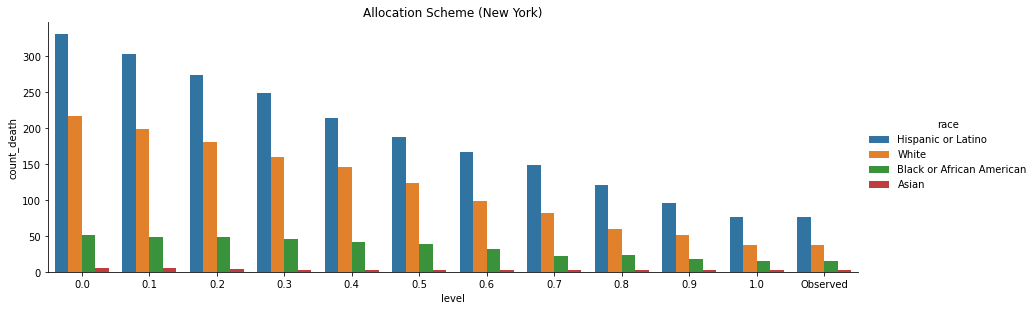

In [190]:
df_new_york_tmp = df_new_york_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_new_york_tmp['level'].unique())
x_val.append(x_val.pop(0))
sns.catplot(x='level', y='count_death', hue='race', data=df_new_york_tmp, kind='bar', height=4, aspect=3, order=x_val)
plt.title('Allocation Scheme (New York)')
plt.show()
sns_plot.savefig("figures_new/count_death_new_york.png")

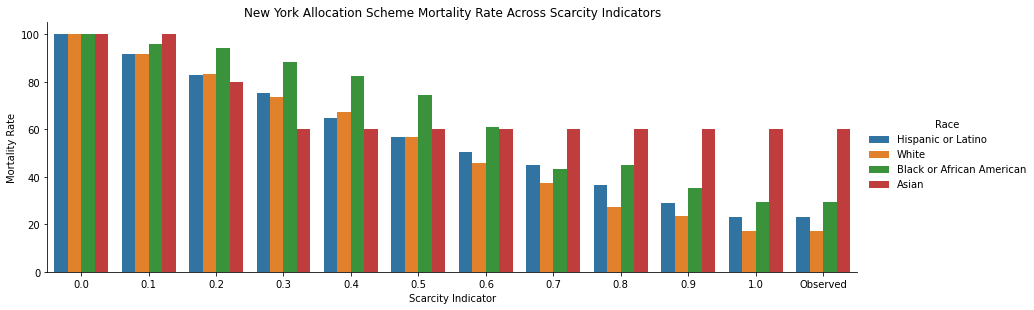

In [191]:
race_hue_labels = df_sample['race_display'].unique()
df_new_york_tmp = df_new_york_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_new_york_tmp['level'].unique())
x_val.append(x_val.pop(0))

sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', hue_order=race_hue_labels, data=df_new_york_tmp, kind='bar', order=x_val, height=4, aspect=3)

plt.title('New York Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sns_plot._legend.set_title('Race')
sns_plot.savefig("figures_new/percentage_death_new_york.png")

## Maryland

In [192]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []
sum_death = 0 # Number of deaths

for level in scarcity_indicator_level:
  
    allocation = Allocation(df_sample, level, calibration_qsofa_mortality)   # Generate Allocation object
    df_alloc = allocation.maryland()                                         # Prioritize patients following Maryland CSC
    
    ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    sum_death += df_alloc['death'].sum()                                   # Sum of all deaths for every level of scarcity
    df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_count_death_race['level'] = round(level, 1)
    df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_count_death_race)

df_maryland = pd.concat(ls_df_count_death_race)
df_maryland['type_allocation'] = 'Maryland'
df_maryland_tmp = pd.concat([death_race_baseline, df_maryland])

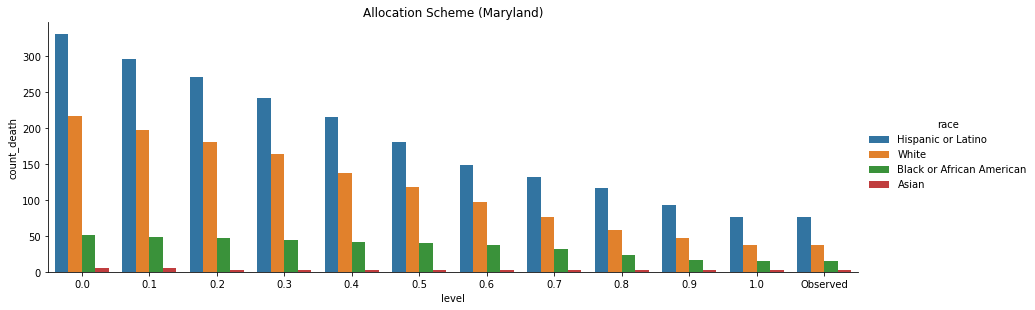

In [193]:
df_maryland_tmp = df_maryland_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_maryland_tmp['level'].unique())
x_val.append(x_val.pop(0))
sns.catplot(x='level', y='count_death', hue='race', data=df_maryland_tmp, kind='bar', order=x_val, height=4, aspect=3)
plt.title('Allocation Scheme (Maryland)')
plt.show()
sns_plot.savefig("figures_new/count_death_maryland.png")

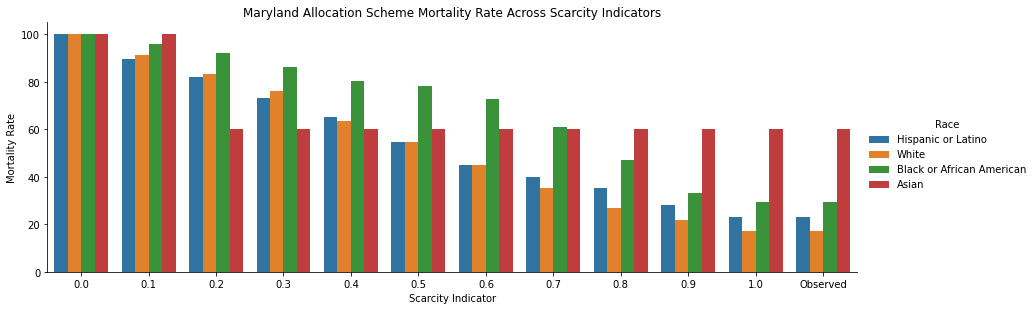

In [194]:
#%matplotlib qt
race_hue_labels = df_sample['race_display'].unique()
df_maryland_tmp = df_maryland_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_maryland_tmp['level'].unique())
x_val.append(x_val.pop(0))

sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', hue_order = race_hue_labels, data=df_maryland_tmp, kind='bar', order=x_val, height=4, aspect=3)

plt.title('Maryland Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sns_plot._legend.set_title('Race')
sns_plot.savefig("figures_new/percentage_death_maryland.png")

## Max Lives Years

In [195]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []
sum_death = 0 # Number of deaths

for level in scarcity_indicator_level:
  
    allocation = Allocation(df_sample, level, calibration_qsofa_mortality)   # Generate Allocation object
    df_alloc = allocation.max_life_years()                                         # Prioritize patients following Maryland CSC
    
    ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    sum_death += df_alloc['death'].sum()                                   # Sum of all deaths for every level of scarcity
    df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_count_death_race['level'] = round(level, 1)
    df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_count_death_race)

df_max_lives_years = pd.concat(ls_df_count_death_race)
df_max_lives_years['type_allocation'] = 'Max Lives Years'
df_max_lives_years_tmp = pd.concat([death_race_baseline, df_max_lives_years])

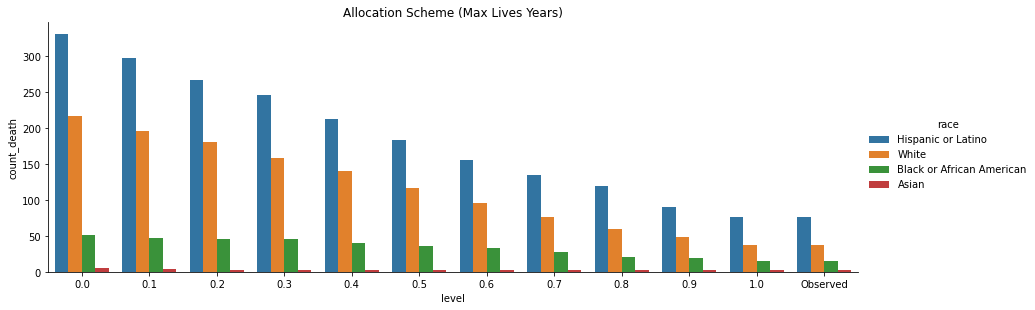

In [196]:
df_max_lives_years_tmp = df_max_lives_years_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_max_lives_years_tmp['level'].unique())
x_val.append(x_val.pop(0))
sns.catplot(x='level', y='count_death', hue='race', data=df_max_lives_years_tmp, kind='bar', order=x_val, height=4, aspect=3)
plt.title('Allocation Scheme (Max Lives Years)')
plt.show()
sns_plot.savefig("figures_new/count_death_max_lives_years.png")

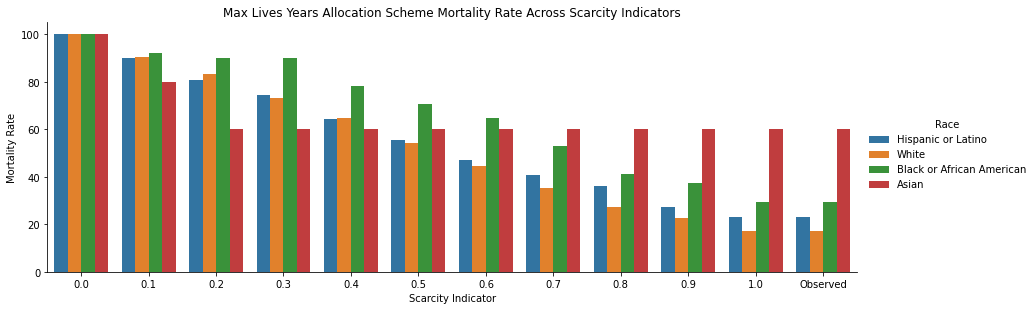

In [197]:
#%matplotlib qt
race_hue_labels = df_sample['race_display'].unique()
df_max_lives_years_tmp = df_max_lives_years_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_max_lives_years_tmp['level'].unique())
x_val.append(x_val.pop(0))

sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', hue_order = race_hue_labels, data=df_max_lives_years_tmp, kind='bar', order=x_val, height=4, aspect=3)

plt.title('Max Lives Years Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sns_plot._legend.set_title('Race')
sns_plot.savefig("figures_new/percentage_death_max_lives_years.png")

## Youngest First

In [198]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []
sum_death = 0 # Number of deaths

for level in scarcity_indicator_level:
  
    allocation = Allocation(df_sample, level, calibration_qsofa_mortality)   # Generate Allocation object
    df_alloc = allocation.youngest()                                         # Prioritize patients following Maryland CSC
    
    ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    sum_death += df_alloc['death'].sum()                                   # Sum of all deaths for every level of scarcity
    df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_count_death_race['level'] = round(level, 1)
    df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_count_death_race)

df_youngest = pd.concat(ls_df_count_death_race)
df_youngest['type_allocation'] = 'Youngest'
df_youngest_tmp = pd.concat([death_race_baseline, df_youngest])

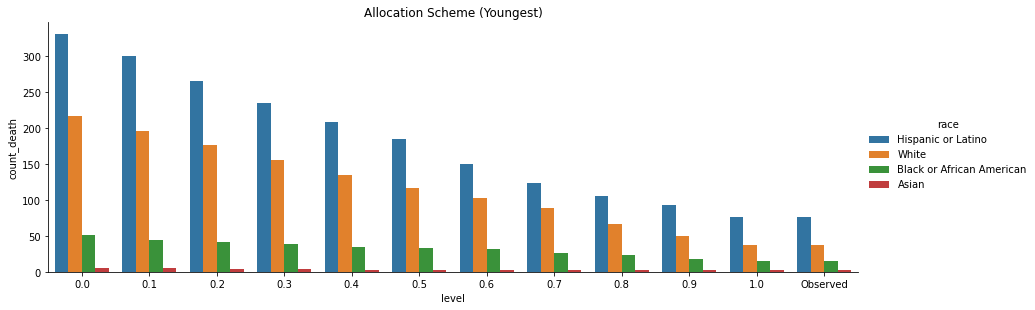

In [199]:
df_youngest_tmp = df_youngest_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_youngest_tmp['level'].unique())
x_val.append(x_val.pop(0))
sns.catplot(x='level', y='count_death', hue='race', data=df_youngest_tmp, kind='bar', order=x_val, height=4, aspect=3)
plt.title('Allocation Scheme (Youngest)')
plt.show()
sns_plot.savefig("figures_new/count_death_youngest.png")

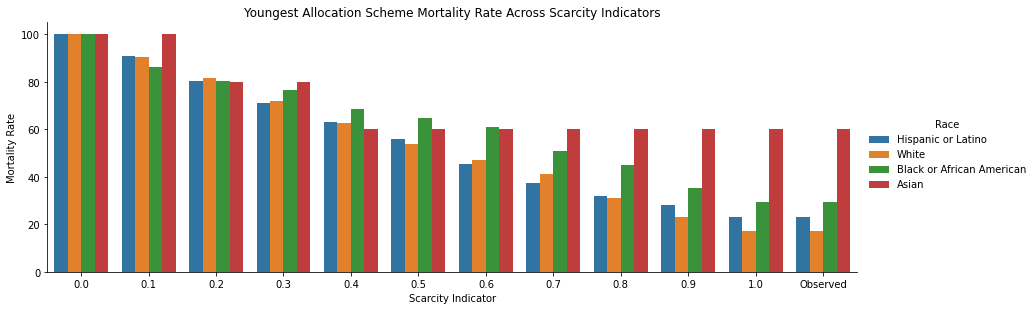

In [200]:
#%matplotlib qt
race_hue_labels = df_sample['race_display'].unique()
df_youngest_tmp = df_youngest_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_youngest_tmp['level'].unique())
x_val.append(x_val.pop(0))

sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', hue_order = race_hue_labels, data=df_youngest_tmp, kind='bar', order=x_val, height=4, aspect=3)

plt.title('Youngest Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sns_plot._legend.set_title('Race')
sns_plot.savefig("figures_new/percentage_death_youngest.png")

## Sickest First

In [201]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []
sum_death = 0 # Number of deaths

for level in scarcity_indicator_level:
  
    allocation = Allocation(df_sample, level, calibration_qsofa_mortality)   # Generate Allocation object
    df_alloc = allocation.sickest()                                         # Prioritize patients following Maryland CSC
    
    ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    sum_death += df_alloc['death'].sum()                                   # Sum of all deaths for every level of scarcity
    df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_count_death_race['level'] = round(level, 1)
    df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_count_death_race)

df_sickest = pd.concat(ls_df_count_death_race)
df_sickest['type_allocation'] = 'Sickest'
df_sickest_tmp = pd.concat([death_race_baseline, df_sickest])

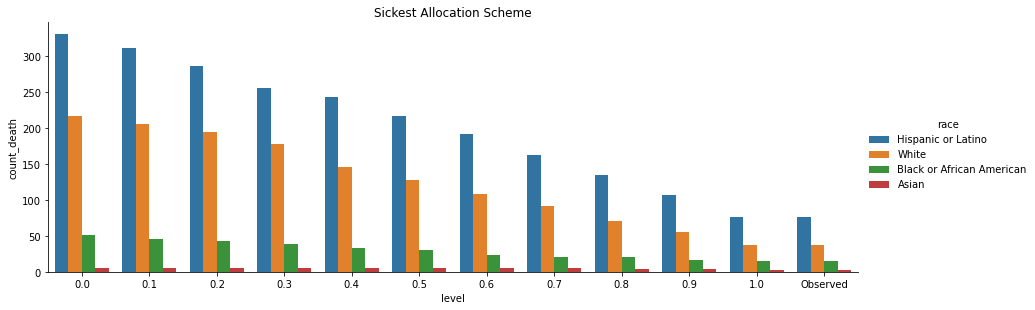

In [202]:
df_sickest_tmp = df_sickest_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_sickest_tmp['level'].unique())
x_val.append(x_val.pop(0))
sns.catplot(x='level', y='count_death', hue='race', data=df_sickest_tmp, kind='bar', order=x_val, height=4, aspect=3)
plt.title('Sickest Allocation Scheme')
plt.show()
sns_plot.savefig("figures_new/count_death_sickest.png")

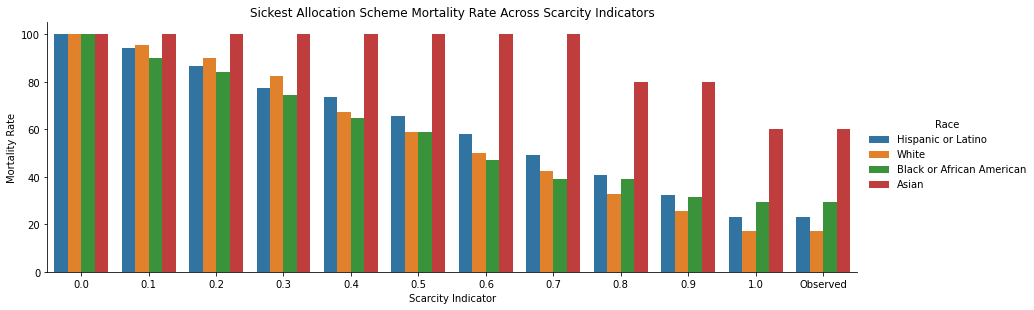

In [203]:
#%matplotlib qt
race_hue_labels = df_sample['race_display'].unique()
df_sickest_tmp = df_sickest_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_sickest_tmp['level'].unique())
x_val.append(x_val.pop(0))

sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', hue_order = race_hue_labels, data=df_sickest_tmp, kind='bar', order=x_val, height=4, aspect=3)

plt.title('Sickest Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sns_plot._legend.set_title('Race')
sns_plot.savefig("figures_new/percentage_death_sickest.png")

# Allocate ventilators (Simulation)

## Lottery

In [204]:
ls_df_count_death_race_level = [] # Store dataframes for all scarcity levels
ls_df_count_death_race_level.append(death_race_baseline)

for level in scarcity_indicator_level:
    sum_death = 0                       # Number of deaths 
    ls_df_alloc_iter = []               # Store allocated dataframes within iteration
    ls_df_count_death_race_iter = []    # Store dataframes of racial death counts within iteration
    ls_dict_count_death_race_iter = []  # Store dictionary of racial death counts within iteration

    for _ in range(iter_simulation):    # Iterate 1000 times per scarcity level

        # Allocate ventilators to patients
        allocation = Allocation(df_sample, level, calibration_qsofa_mortality)
        df_alloc = allocation.lottery()

        # Examine the number of deaths for each racial group
        ls_df_alloc_iter.append(df_alloc)
        sum_death += df_alloc['death'].sum()
        df_death = df_alloc.loc[df_alloc['death']==1]
        
        # Convert dictionary to dataframe
        dict_count_death_race = Counter(df_death['race_display'])
        df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
        df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
        
        # List the count of deaths for each racial group
        ls_dict_count_death_race_iter.append(dict_count_death_race)
        ls_df_count_death_race_iter.append(df_count_death_race)
    
    df_count_death_race_level = pd.concat(ls_df_count_death_race_iter)
    df_count_death_race_level['level'] = round(level, 1)
    df_count_death_race_level['percentage_death'] = df_count_death_race_level.apply(lambda row: percentage_death(row), axis=1)
    df_count_death_race_level['avg_death'] = statistics.mean(df_count_death_race_level['count_death'])
    df_count_death_race_level['type_allocation'] = 'Lottery'
    
    ls_df_count_death_race_level.append(df_count_death_race_level)

df_lottery = pd.concat(ls_df_count_death_race_level)
#ls_df_count_death_race_level.append(death_race_baseline)
df_lottery_tmp = pd.concat(ls_df_count_death_race_level)
#all_iters_df.to_csv('sim_results/all_ny.csv'.format(level.round(3)))


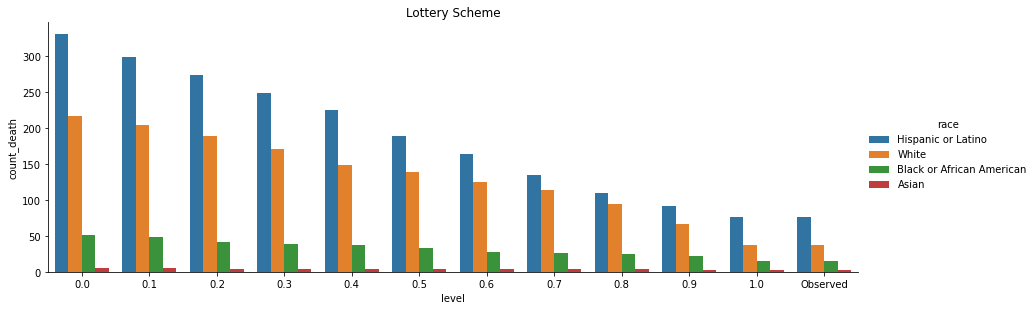

In [205]:
df_lottery_tmp = df_lottery_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_lottery_tmp['level'].unique())
x_val.append(x_val.pop(0))
sns.catplot(x='level', y='count_death', hue='race', data=df_lottery_tmp, kind='bar', order=x_val, height=4, aspect=3)
plt.title('Lottery Scheme')
plt.show()
sns_plot.savefig("figures_new/count_death_lottery.png")

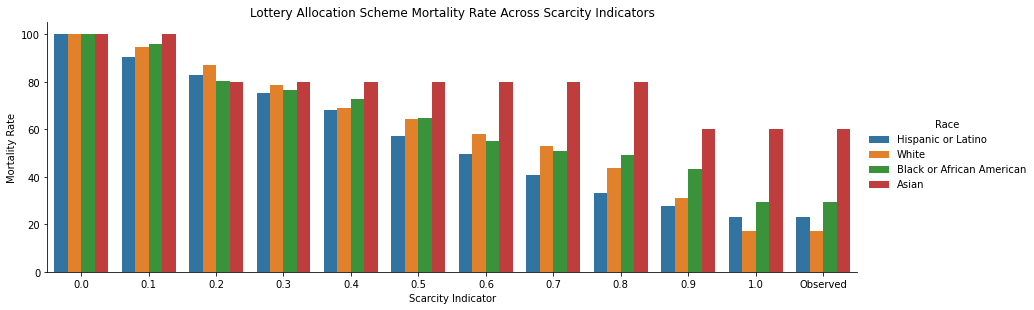

In [206]:
race_hue_labels = df_sample['race_display'].unique()
df_lottery_tmp = df_lottery_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_lottery_tmp['level'].unique())
x_val.append(x_val.pop(0))

sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', hue_order=race_hue_labels, data=df_lottery_tmp, kind='bar', order=x_val, height=4, aspect=3)

plt.title('Lottery Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sns_plot._legend.set_title('Race')
sns_plot.savefig("figures_new/percentage_death_lottery.png")

# Total 

In [207]:
df_csc_all = pd.concat([
    df_new_york[['type_allocation', 'level', 'avg_death']], 
    df_maryland[['type_allocation', 'level', 'avg_death']], 
    df_max_lives_years[['type_allocation', 'level', 'avg_death']], 
    df_youngest[['type_allocation', 'level', 'avg_death']], 
    df_sickest[['type_allocation', 'level', 'avg_death']], 
    df_lottery[['type_allocation', 'level', 'avg_death']], 
])

In [208]:
#df_csc_all.to_csv('total_avg_deaths_data_results.csv', index=False)

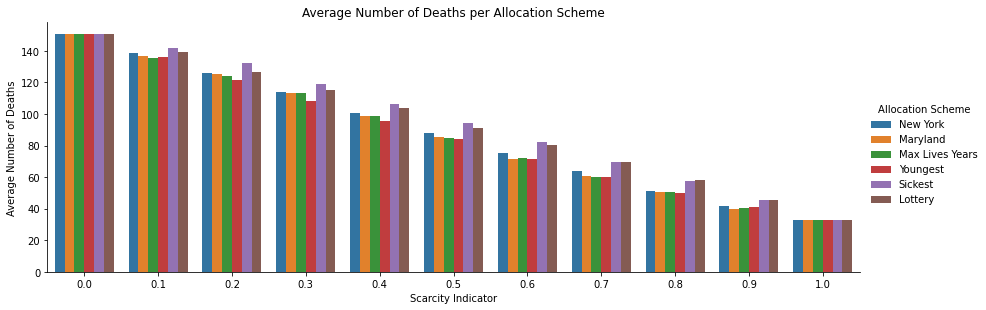

In [209]:
#%matplotlib qt
sns_plot = sns.catplot(x='level', y='avg_death', hue='type_allocation', data=df_csc_all[df_csc_all['level']!=2.0], kind='bar', legend_out=True, height=4, aspect=3)
plt.title('Average Number of Deaths per Allocation Scheme')
sns_plot._legend.set_title('Allocation Scheme')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Average Number of Deaths')
sns_plot.savefig("figures_new/total_average_death.png")